Conjuntos de entrenamiento y prueba (función train_test_split) --- 15:59
===

* Ultima modificación: 2023-02-27 | [YouTube](https://www.youtube.com/watch?v=2jH880FXx1M&list=PLEFpZ3YehTnD1Cic9Xx92wWSvEUMYhUBD&index=2)

Generación de los datos del experimiento
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

In [2]:
#
# Función a aproximar
# (Proceso geneador de datos)
#
def f(x):
    return 2 * np.abs(np.sin(x * np.pi / 4 + 0.75)) / (1 + 0.1 * x)


#
# Datos reales.
# (No disponibles en la realidad)
#
x_real = np.linspace(0, 10, 100)
X_real = x_real[:, np.newaxis]
y_real = f(x_real)

In [3]:
#
# Muestra de datos.
# (Información disponible en la realidad)
#
rng = np.random.default_rng(12345)

x_sample = x_real.copy()
rng.shuffle(x_sample)
x_sample = x_sample[:25]
x_sample = np.sort(x_sample)

y_sample = f(x_sample)
X_sample = x_sample[:, np.newaxis]

Muestras en entrenamiento y prueba
-----

* La generalización del modelo debe estimarse a partir de los datos disponibles.

* Los datos disponibles se dividen en dos conjuntos: uno para ajuste de parámetros del modelo y otro para medir la generalización.

* La totalidad de la información es usada para determinar el grado óptimo del polinómio y sus coeficientes.

* Esta aproximación es usada en TensorFlow

In [4]:
from sklearn.model_selection import train_test_split

#
# Se usan 20 ejemplos para entrenamiento del modelo y los 5 restantes
# para medir la generalización.
#
X_train, X_test, y_train_true, y_test_true = train_test_split(
    # --------------------------------------------------------------------------
    # Los primeros train_size ejemplos son asignados al conjunto de
    # entrenamiento. Del resto de la muestra, los primeros test_size son
    # asignados a la muestra de prueba
    X_sample,
    y_sample,
    # --------------------------------------------------------------------------
    # Tamaño de la muestra de prueba.
    # int: indica la cantidad de muestras
    # float: indica el porcentaje y debe estar entre 0.0 y 1.0
    test_size=5,
    # --------------------------------------------------------------------------
    # Tamaño de la muestra de entrenamiento.
    # int: indica la cantidad de muestras
    # float: indica el porcentaje y debe estar entre 0.0 y 1.0
    train_size=None,
    # --------------------------------------------------------------------------
    # Semilla del generador aleatorio
    random_state=12345,
    # --------------------------------------------------------------------------
    # Mezcla los ejemplos antes de hacer la partición
    shuffle=True,
)

Evaluación para la muestra de datos disponible
----

In [5]:
import pandas as pd
from sklearn.metrics import mean_squared_error

degrees = list(range(1, 21))

mse_train = []
mse_test = []

for i_degree, degree in enumerate(degrees):

    model = make_pipeline(
        PolynomialFeatures(degree, include_bias=False),
        MinMaxScaler(),
        LinearRegression(),
    )
    model.fit(X_train, y_train_true)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train.append(mean_squared_error(y_train_true, y_train_pred))
    mse_test.append(mean_squared_error(y_test_true, y_test_pred))


df = pd.DataFrame(
    {
        "Degree": degrees,
        "MSE train": mse_train,
        "MSE test": mse_test,
    }
).sort_values("MSE test", ascending=True)

df

Degree     MSE train  MSE test
12      13  2.569114e-03  0.004460
11      12  3.050878e-03  0.005659
7        8  4.805502e-03  0.007449
9       10  3.288722e-03  0.008090
10      11  3.231417e-03  0.008158
13      14  1.659855e-04  0.008645
8        9  4.452212e-03  0.009193
14      15  1.396318e-04  0.012043
5        6  4.985391e-02  0.067708
15      16  1.341672e-06  0.092032
6        7  4.161630e-02  0.096340
1        2  1.643983e-01  0.124775
3        4  1.608594e-01  0.127289
2        3  1.640714e-01  0.129384
0        1  1.953021e-01  0.148287
16      17  7.344360e-07  0.164239
17      18  6.984203e-07  0.180042
4        5  1.417809e-01  0.221484
18      19  1.582244e-09  1.183285
19      20  7.800070e-09  1.595324

In [6]:
#
# Grado óptimo del polinomio
#
df.Degree.iloc[0]

13

Pronóstico con el mejor modelo encontrado
---

In [7]:
optimal_degree = df.Degree.iloc[0]

model = make_pipeline(
    PolynomialFeatures(optimal_degree, include_bias=False),
    MinMaxScaler(),
    LinearRegression(),
)

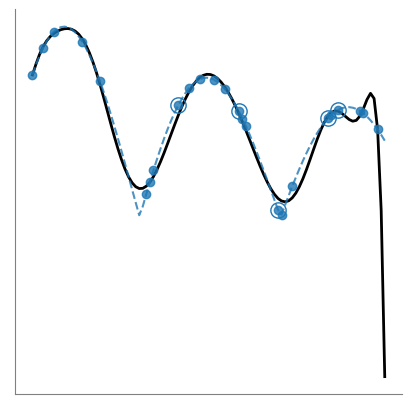

In [8]:
#
# Opción 1: Modelo óptimo entrenado solo con la muestra de
#   entrenamiento.
#
model.fit(X_train, y_train_true)

y_pred = model.predict(X_real)

plt.figure(figsize=(5, 5))
plt.plot(x_real, y_real, "--", color="tab:blue", alpha=0.8, zorder=10)
plt.plot(x_sample, y_sample, "o", color="tab:blue", alpha=0.8, zorder=10)
plt.plot(
    X_test,
    y_test_true,
    "o",
    color="tab:blue",
    alpha=1.0,
    zorder=10,
    markersize=11,
    fillstyle="none",
)

plt.plot(
    x_real,
    y_pred,
    color="black",
    linewidth=2,
)

plt.xticks([], [])
plt.yticks([], [])

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

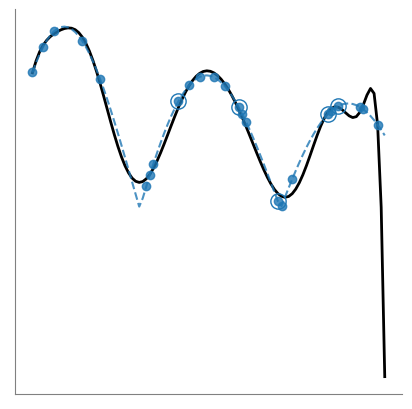

In [9]:
#
# Opción 2: Modelo óptimo entrenado con la totalidad de
#   la muestra.
#
model.fit(X_sample, y_sample)

y_pred = model.predict(X_real)

plt.figure(figsize=(5, 5))
plt.plot(x_real, y_real, "--", color="tab:blue", alpha=0.8, zorder=10)
plt.plot(x_sample, y_sample, "o", color="tab:blue", alpha=0.8, zorder=10)
plt.plot(
    X_test,
    y_test_true,
    "o",
    color="tab:blue",
    alpha=1.0,
    zorder=10,
    markersize=11,
    fillstyle="none",
)

plt.plot(
    x_real,
    y_pred,
    color="black",
    linewidth=2,
)

plt.xticks([], [])
plt.yticks([], [])

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()